In [53]:
%load_ext autoreload
%autoreload 2

from collections import OrderedDict
import json
import sys
sys.path.append('src')

import numpy as np
from sklearn.cluster import KMeans

from bridge_base_new import Bridge, Support, ZkLoad
#from bridge import Bridge_64, Bridge_160

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 计算

### 输入参数

In [114]:
# 常量
E = 21 * 10**10           # 杨氏模量 (Pa)
P = 1                     # 外力    (kN)
h = 2.52                  # 恒载    (kN)
bottom_chord_length = 8.   # 下弦杆长度/下节点间距 (m)
bridge_len = 160
path = './data'

zk_load = ZkLoad(uniform_len=160)
bridge = Bridge(bridge_len)

### 读入数据

In [115]:
# 读入节点数据 => 读入杆件数据 => 读入参数
bridge.load_nodes_data(path)
bridge.load_units_data(path)
bridge.load_params(E=E, 
                   P=P, 
                   h=h, 
                   bottom_chord_length=bottom_chord_length, 
                   load=zk_load)

In [116]:
# 导入截面参数
# 从文件导入
bridge.load_section_params(path)

# 手动导入 (在检算中使用)
# b1, t1, b2, t2 = 0.215, 0.012, 0.436, 0.010
#bridge.set_section_params()

### 添加支座

In [117]:
# 添加支座

bridge.set_supports([Support(1, h=False, v=True),
                     Support(21, h=True, v=True),
                     Support(40, h=False, v=True)])

### 总体刚度矩阵

In [118]:
bridge.K

array([[ 9.951e+08,  3.966e+08, -2.884e+08, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 3.966e+08,  5.453e+08, -3.966e+08, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-2.884e+08, -3.966e+08,  1.556e+09, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  5.139e+08,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  8.504e+08,
        -1.977e+08],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00, -1.977e+08,
         2.718e+08]])

### 单元刚度矩阵

In [120]:
for unit in bridge.units.values():
    print('单元 %d\n%s' % (unit.num, unit.kij))

单元 1
[[ 2.884e+08  3.966e+08 -2.884e+08 -3.966e+08]
 [ 3.966e+08  5.453e+08 -3.966e+08 -5.453e+08]
 [-2.884e+08 -3.966e+08  2.884e+08  3.966e+08]
 [-3.966e+08 -5.453e+08  3.966e+08  5.453e+08]]
单元 2
[[ 7.067e+08  0.000e+00 -7.067e+08 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-7.067e+08 -0.000e+00  7.067e+08  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
单元 3
[[ 9.434e-24  1.541e-07 -9.434e-24 -1.541e-07]
 [ 1.541e-07  2.516e+09 -1.541e-07 -2.516e+09]
 [-9.434e-24 -1.541e-07  9.434e-24  1.541e-07]
 [-1.541e-07 -2.516e+09  1.541e-07  2.516e+09]]
单元 4
[[ 1.124e+09  0.000e+00 -1.124e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.124e+09 -0.000e+00  1.124e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
单元 5
[[ 1.438e+08 -1.977e+08 -1.438e+08  1.977e+08]
 [-1.977e+08  2.718e+08  1.977e+08 -2.718e+08]
 [-1.438e+08  1.977e+08  1.438e+08 -1.977e+08]
 [ 1.977e+08 -2.718e+08 -1.977e+08  2.718e+08]]
单元 6
[[ 7.067e+08  0.000e+00 -

### 节点竖向位移与影响线

In [150]:
bridge.get_nodes_vdisps()

所有节点竖向位移已计算完毕.


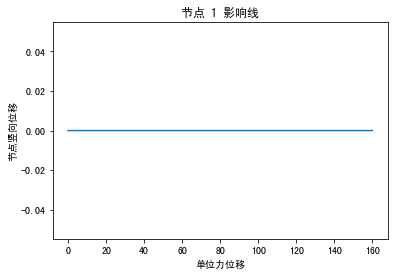

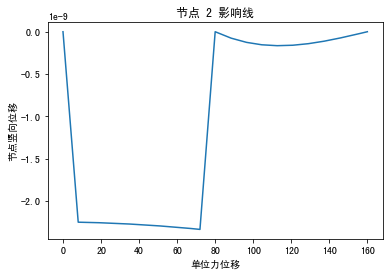

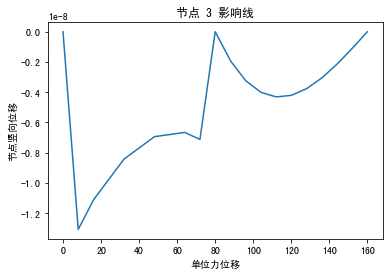

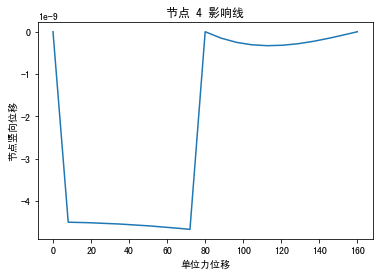

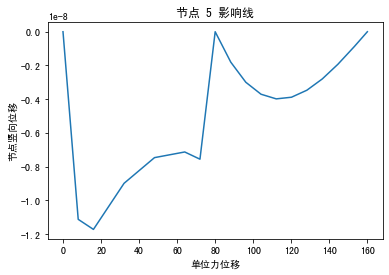

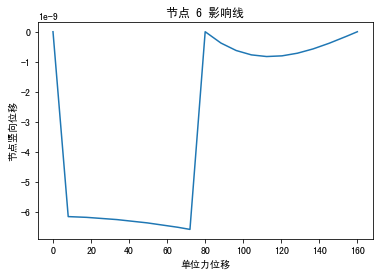

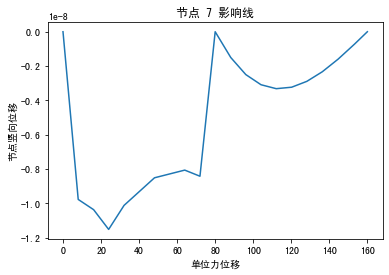

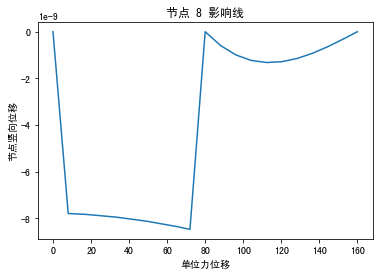

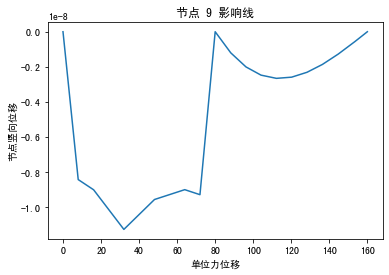

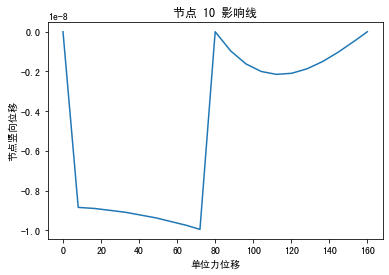

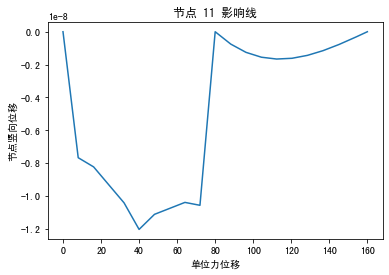

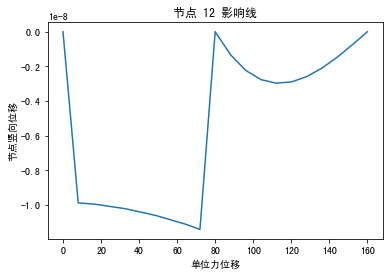

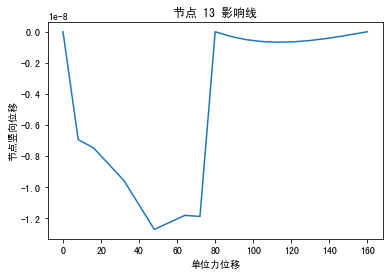

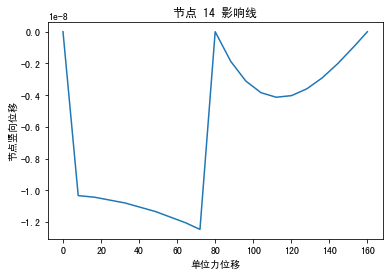

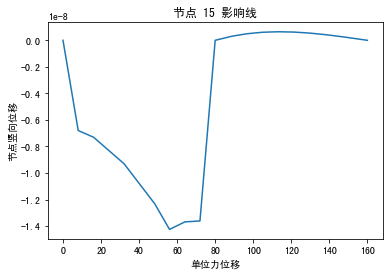

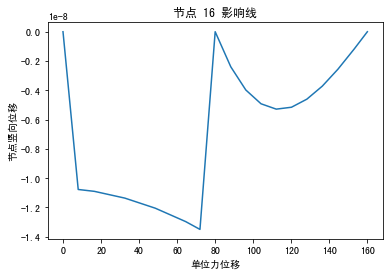

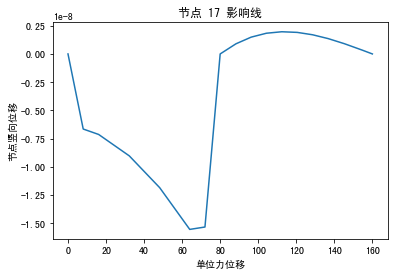

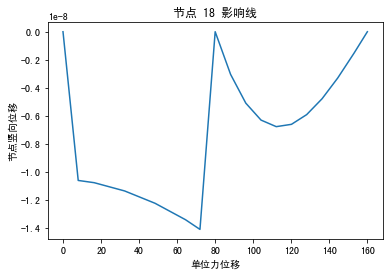

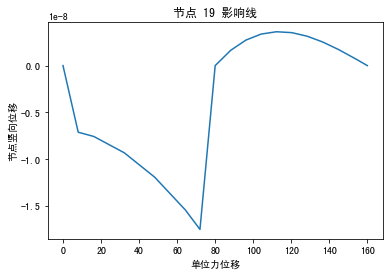

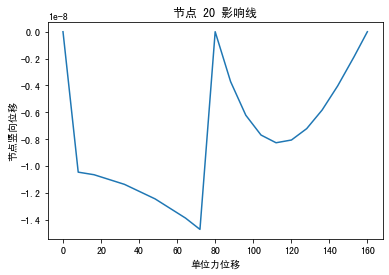

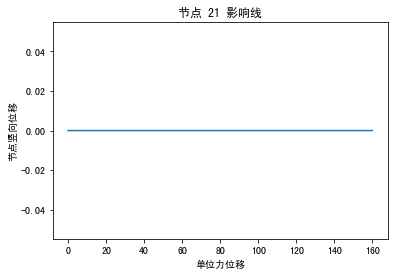

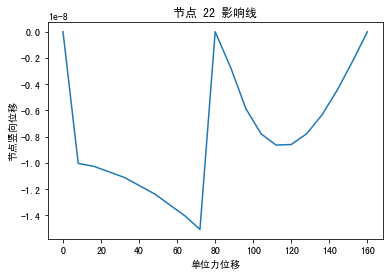

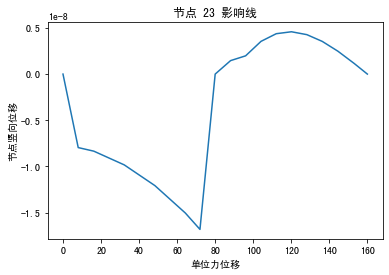

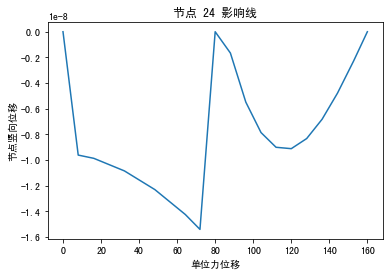

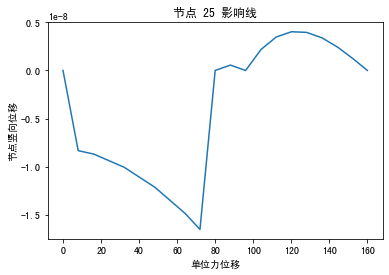

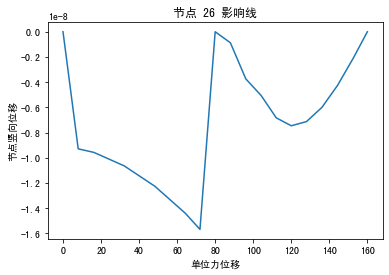

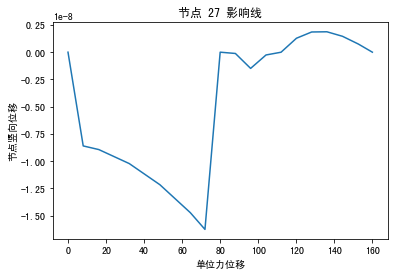

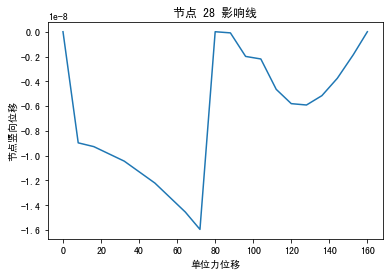

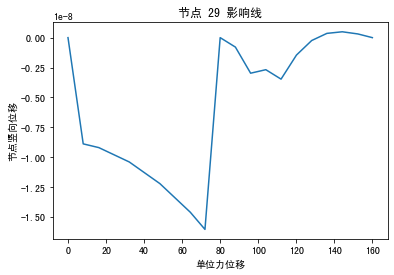

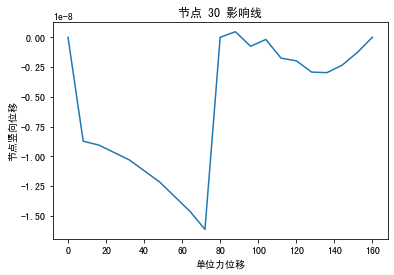

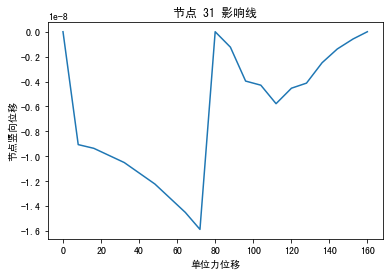

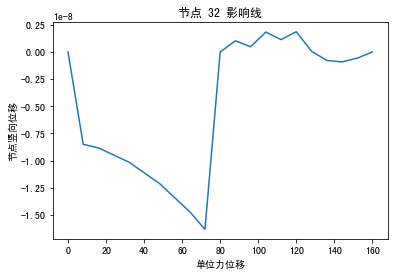

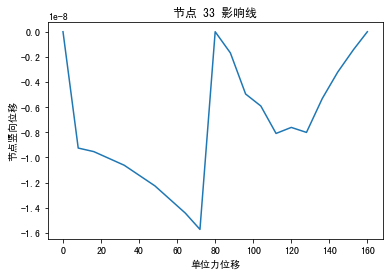

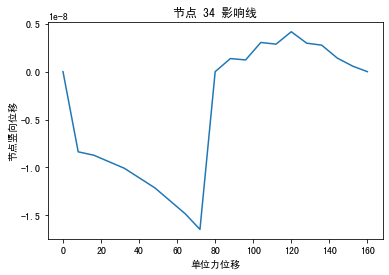

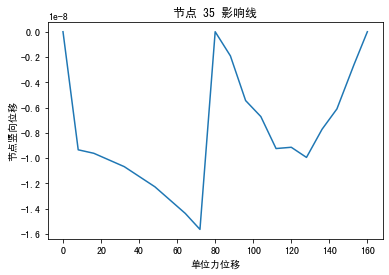

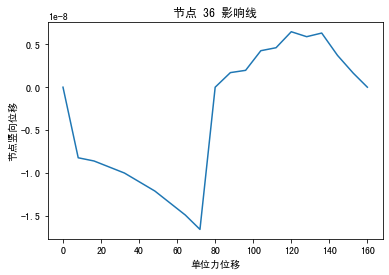

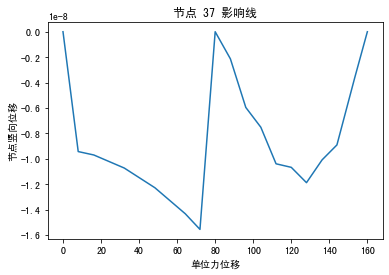

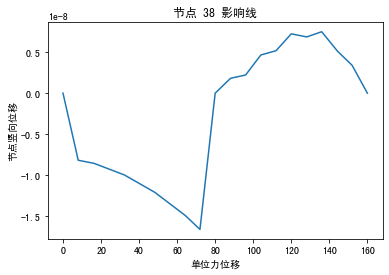

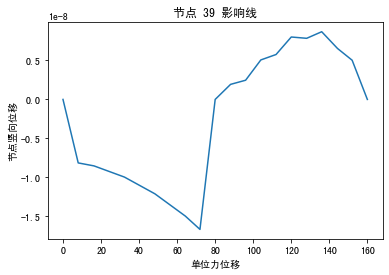

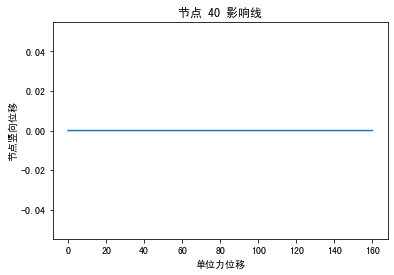

In [151]:
bridge.show_nodes_vdisps()

### 轴力与影响线

In [152]:
bridge.get_units_axial_forces()

所有杆件单元轴力已计算完毕.
所有零杆已标识.


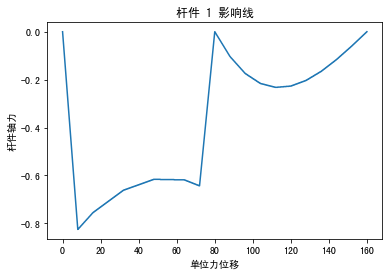

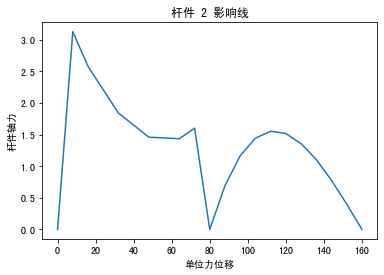

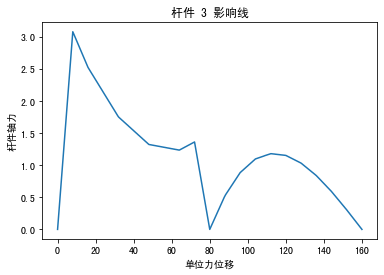

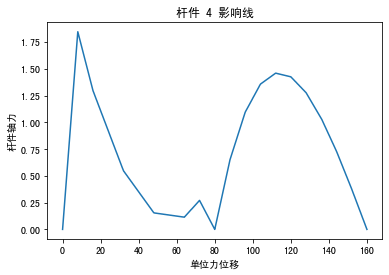

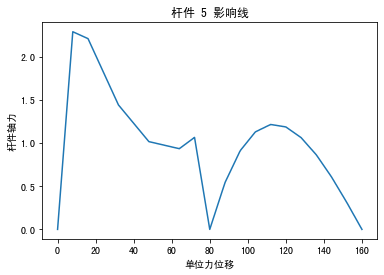

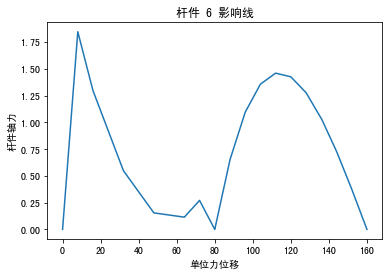

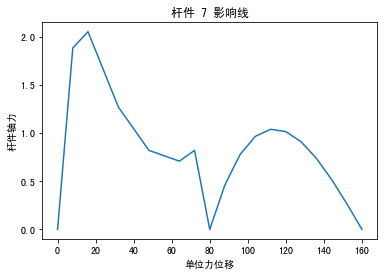

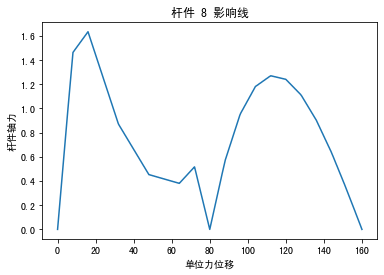

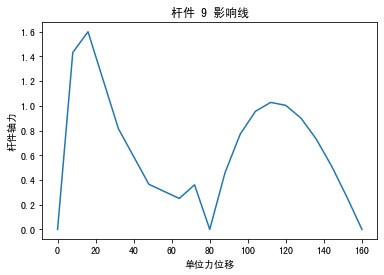

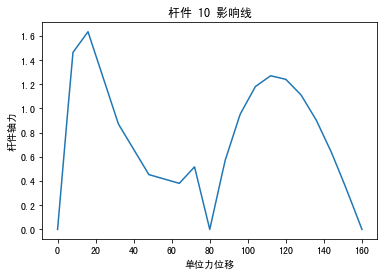

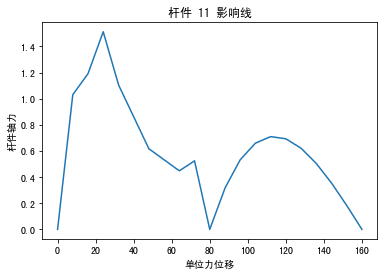

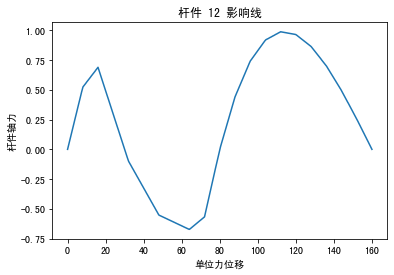

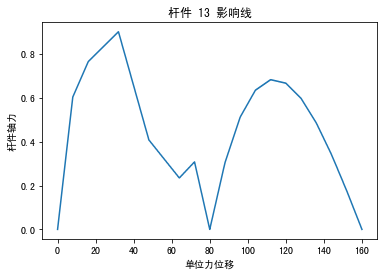

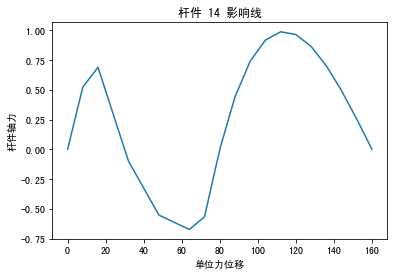

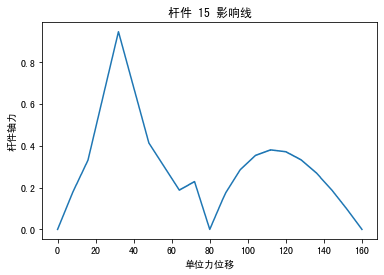

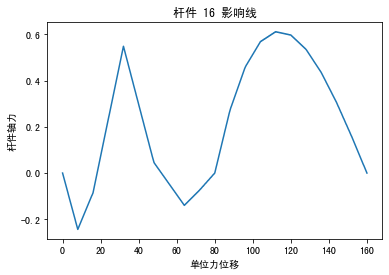

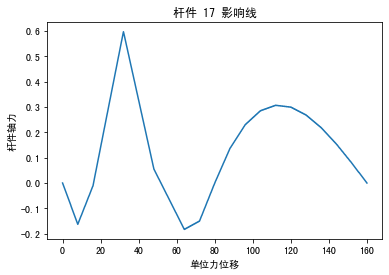

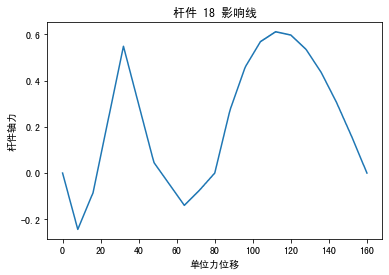

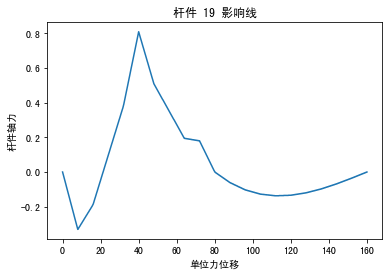

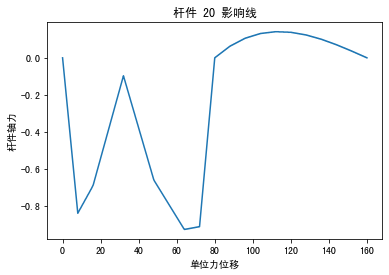

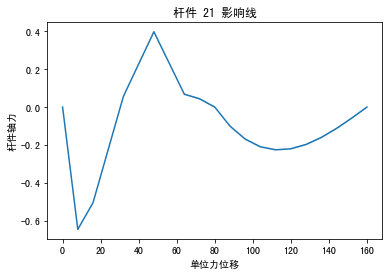

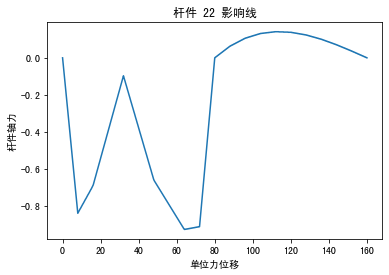

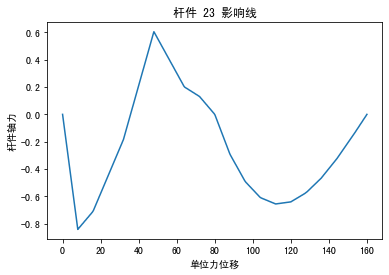

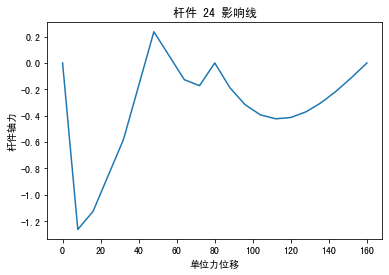

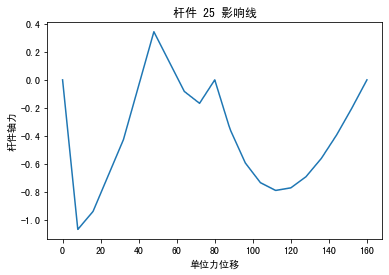

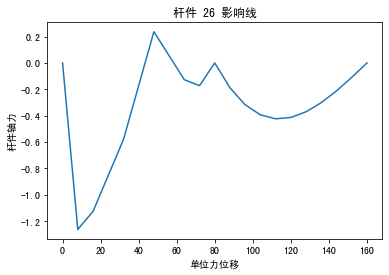

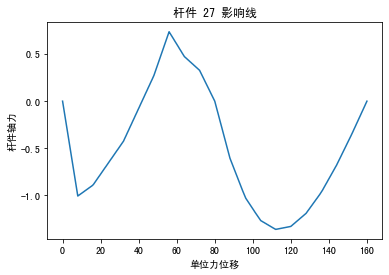

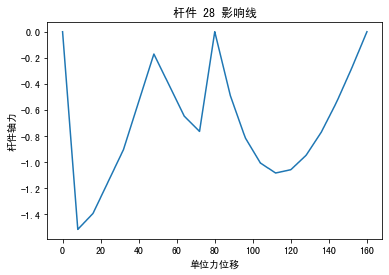

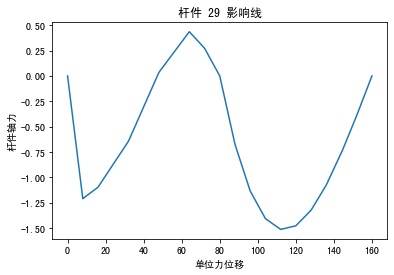

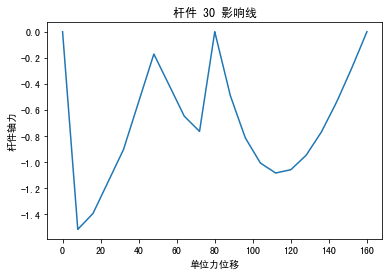

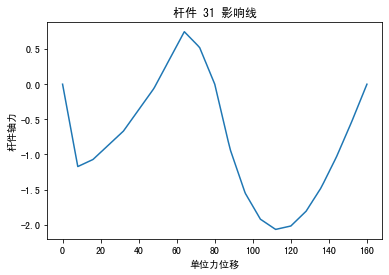

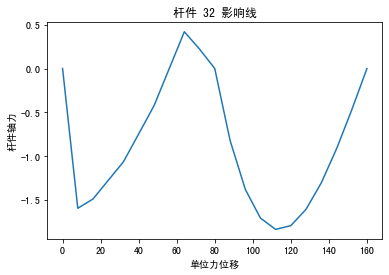

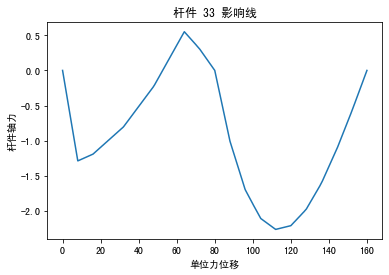

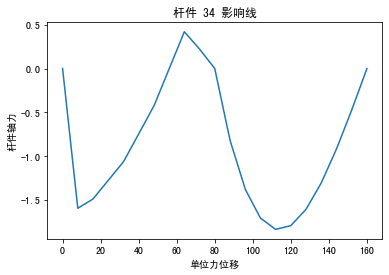

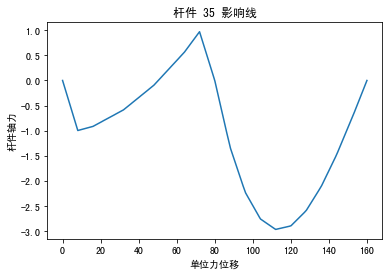

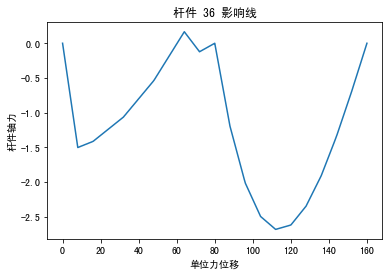

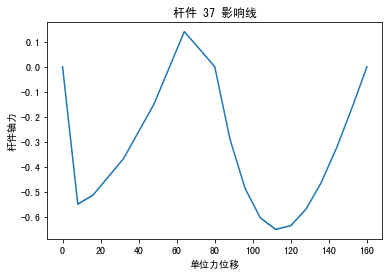

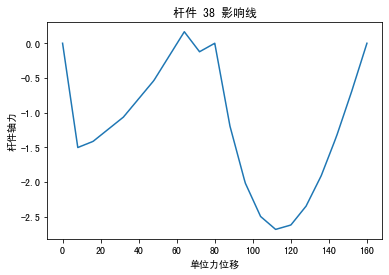

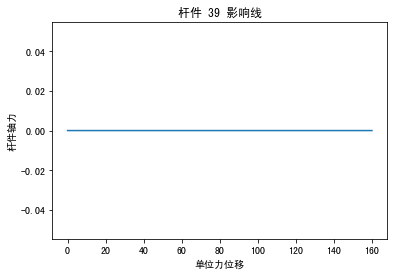

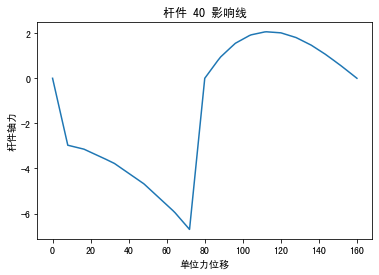

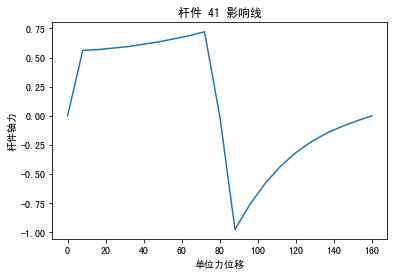

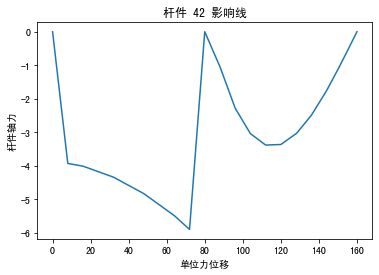

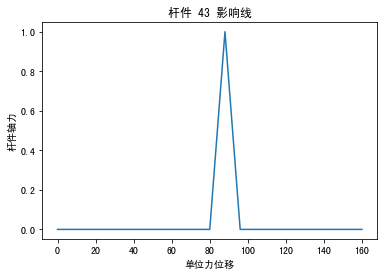

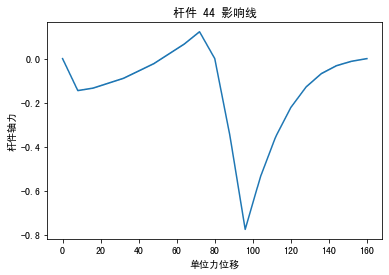

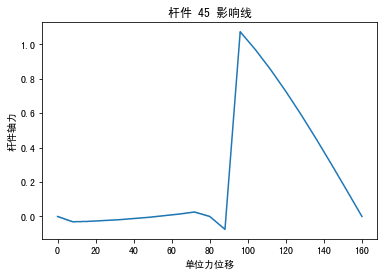

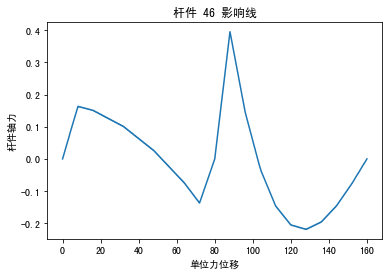

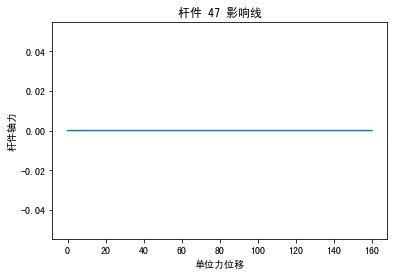

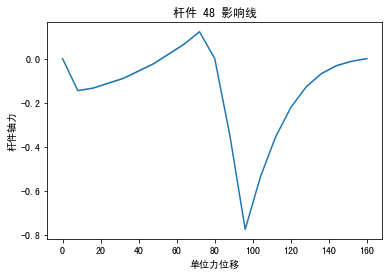

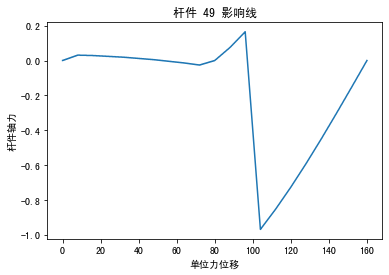

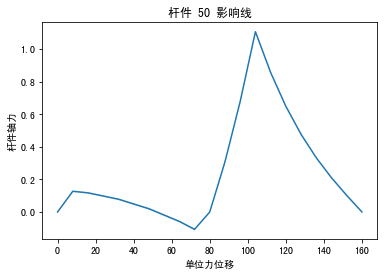

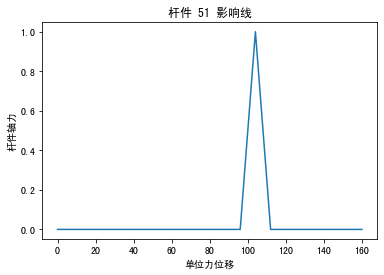

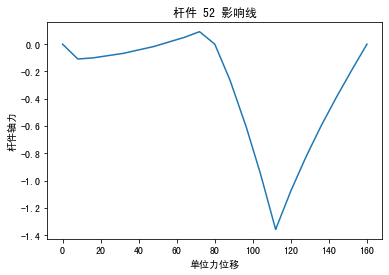

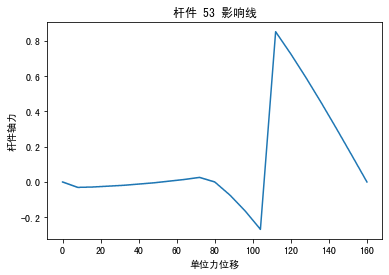

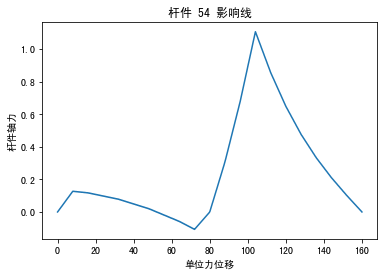

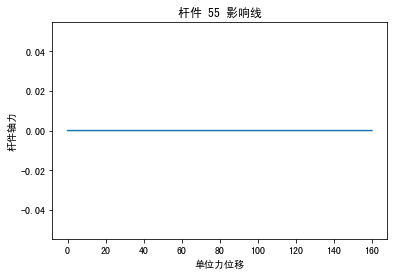

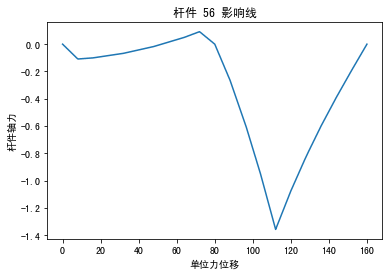

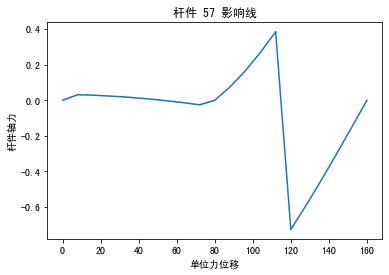

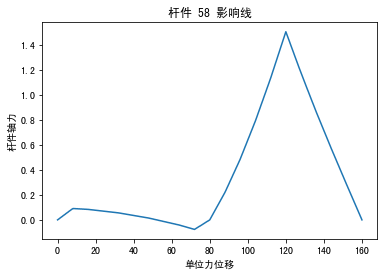

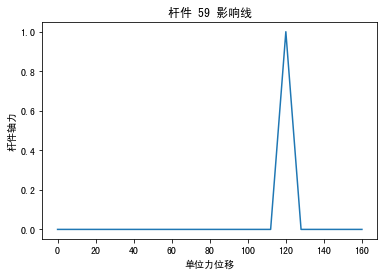

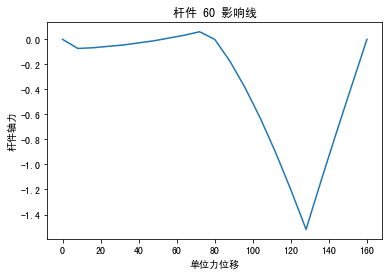

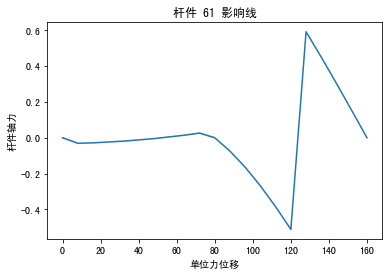

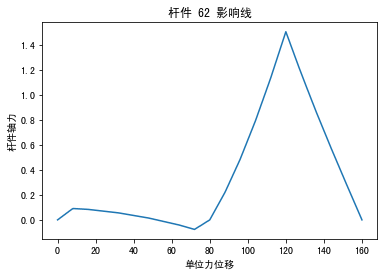

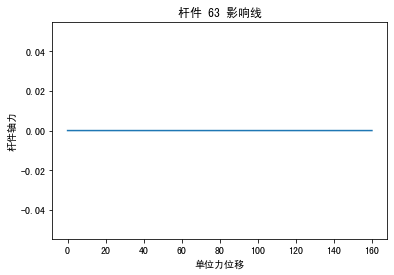

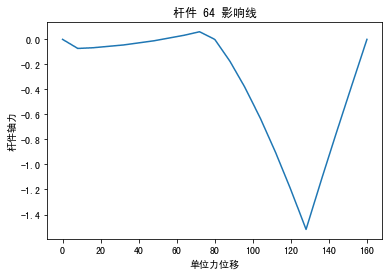

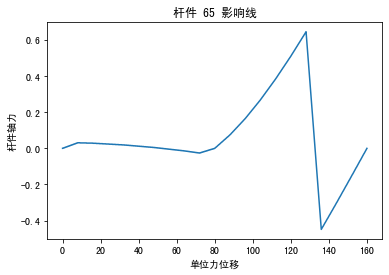

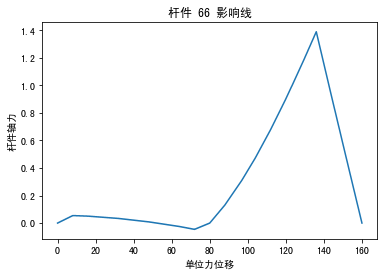

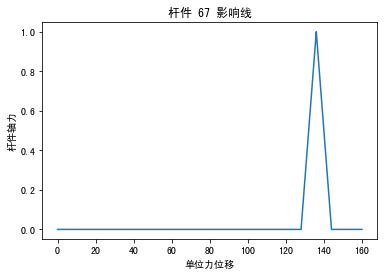

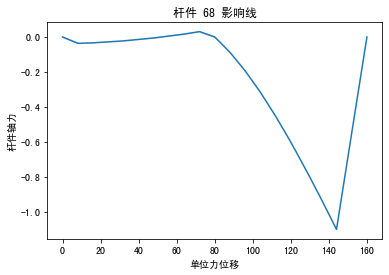

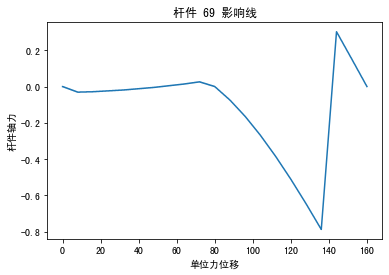

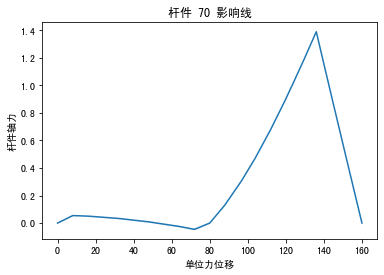

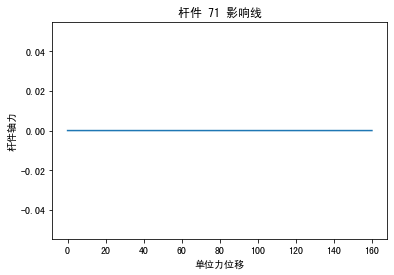

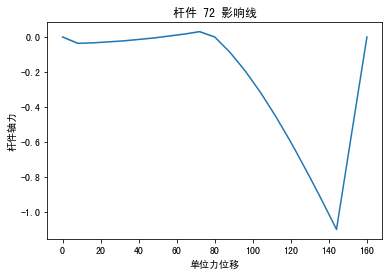

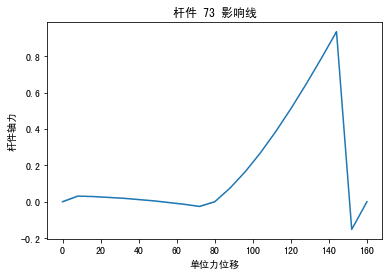

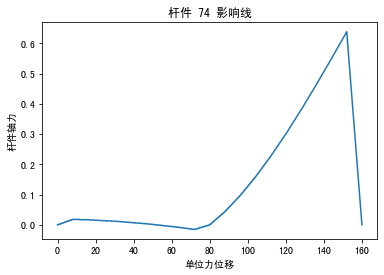

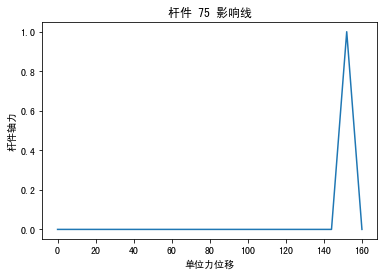

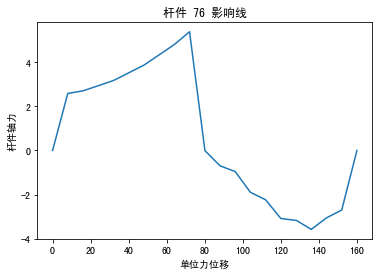

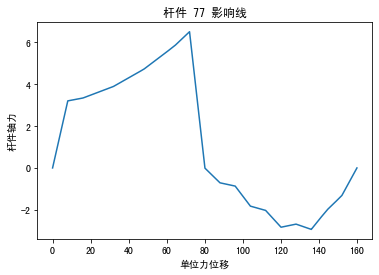

In [166]:
# 轴力影响线
bridge.show_units_axial_forces()

In [167]:
# 竖杆
bridge.vertical_units

[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75]

## 检算

### 初始化截面参数

In [168]:
# 梁截面数据([腹板宽度 翼缘厚度 腹板厚度 翼缘宽度])
#             b2       t1      t2     b1
b1, t1, b2, t2 = [0.288, 0.04, 0.052, 0.024]
section_params = [b2, t1, t2, b1]

# 设置截面参数
bridge.set_section_params(bridge.units_nums, section_params)
bridge.update()

所有单元 [单元刚度矩阵] 已重新计算.
所有单元 [毛面积] 已重新计算.
[总体刚度矩阵] 已重新计算.
[缩减刚度矩阵] 已重新计算.
所有节点竖向位移已计算完毕.
所有杆件单元轴力已计算完毕.
所有零杆已标识.
所有杆件单元最不利荷载已计算完毕.
所有杆件单元最不利位移已计算完毕.


### 根据最大内力N聚类

In [169]:
# 前一半节点编号
target_units_nums = list(range(1, 40))

# 根据最大内力N聚类
units_clusters = bridge.get_units_clusters(target_units_nums, n_clusters=7)
units_clusters

OrderedDict([(0, [12, 13, 14, 15, 16, 18]),
             (1, [28, 29, 30, 31, 32, 33, 34]),
             (2, [2, 3, 5]),
             (3, [17, 19, 21, 39]),
             (4, [1, 20, 22, 23, 24, 25, 26, 27, 37]),
             (5, [4, 6, 7, 8, 9, 10, 11]),
             (6, [35, 36, 38])])

In [170]:
for label, units_cluster in units_clusters.items():
    print('类别 %d' % label)
    for unit_num in units_cluster:
        print(unit_num, bridge.units[unit_num].N)
    print()

类别 0
12 [ 6446.868 -1185.884]
13 [7890.771 1726.327]
14 [ 6446.868 -1185.884]
15 [5594.875 1184.472]
16 [4353.856  381.007]
18 [4353.856  381.007]

类别 1
28 [ -2746.049 -12659.192]
29 [ -1534.322 -11520.737]
30 [ -2746.049 -12659.192]
31 [ -1561.456 -14845.582]
32 [ -2747.701 -15965.75 ]
33 [ -2510.855 -16428.979]
34 [ -2747.701 -15965.75 ]

类别 2
2 [24061.115  5201.737]
3 [20721.313  4435.742]
5 [17613.289  3807.208]

类别 3
17 [2747.813   58.339]
19 [2179.557 -805.365]
21 [  494.27  -2368.314]
39 [2.52 2.52]

类别 4
1 [-1382.316 -6395.087]
20 [ -253.551 -5021.782]
22 [ -253.551 -5021.782]
23 [  353.27 -5253.68]
24 [-1018.502 -6368.979]
25 [-1029.466 -7142.565]
26 [-1018.502 -6368.979]
27 [ -362.494 -9856.249]
37 [ -944.461 -5402.246]

类别 5
4 [13258.743  2859.994]
6 [13258.743  2859.994]
7 [15296.008  3297.359]
8 [13846.966  3012.818]
9 [11500.309  2476.927]
10 [13846.966  3012.818]
11 [10731.669  2308.521]

类别 6
35 [ -2319.045 -19511.779]
36 [ -4434.551 -21176.518]
38 [ -4434.551 -21176.51

In [165]:
'''
clusters == OrderedDict(
    [(0, [10, 14, 18, 22, 26, 30, 33, 36]),
     (1, [38]),
     (2, [3, 7, 11, 15, 19, 23, 27, 31, 35, 39]),
     (3, [12, 16, 20, 24]),
     (4, [2, 5, 6, 13, 17, 25, 28, 32]),
     (5, [37]),
     (6, [1, 4, 8, 9, 21, 29, 34])]
)
'''
# 补充剩余节点编号
units_clusters[0] += [40, 45, 50, 54, 58, 62, 66, 70]
units_clusters[1] += [42]
units_clusters[2] += [43, 47, 51, 55, 59, 63, 67, 71, 75]
units_clusters[3] += [52, 56, 60, 64]
units_clusters[4] += [46, 49, 57, 68, 69, 72, 76]
units_clusters[5] += [41]
units_clusters[6] += [44, 48, 53, 61, 65, 73, 74, 77]

for i, cluster in units_clusters.items():
    print(i, cluster)

0 [12, 13, 14, 15, 16, 18, 40, 45, 50, 54, 58, 62, 66, 70]
1 [28, 29, 30, 31, 32, 33, 34, 42]
2 [2, 3, 5, 43, 47, 51, 55, 59, 63, 67, 71, 75]
3 [17, 19, 21, 39, 52, 56, 60, 64]
4 [1, 20, 22, 23, 24, 25, 26, 27, 37, 46, 49, 57, 68, 69, 72, 76]
5 [4, 6, 7, 8, 9, 10, 11, 41]
6 [35, 36, 38, 44, 48, 53, 61, 65, 73, 74, 77]


### 保存杆件聚类数据

In [ ]:
with open('units_clusters.json', 'w') as units_clusters_file:                                
    json.dump(units_clusters, units_clusters_file)

### 读取杆件聚类数据

In [ ]:
# units_clusters = bridge.load_units_clusters(path)

### 创建检算器

In [ ]:
bridge.check()
checker = Checker(bridge)

### 调节截面参数

In [ ]:
# b = 2 * t1 + b2 = 0.46
# h = 2 * b1 + t2 = 0.76
B = {
    '0':  0.46, 
    '1':  0.46, 
    '2':  0.46, 
    '3':  0.46,
    '4':  0.46, 
    '5':  0.46, 
    '6':  0.46
}

T1 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}


H = {
    '0':  0.60,  
    '1':  0.76,  
    '2':  0.44, 
    '3':  0.44,
    '4':  0.76, 
    '5':  0.60, 
    '6':  0.60 
}


T2 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}

In [ ]:
for label, units_cluster in units_clusters.items():
    # 每一类的参数
    b, t1 = B[label], T1[label]
    b2 = b - 2 * t1
    
    h, t2 = H[label], T2[label]
    b1 = (h - t2) / 2
    
    section_params = [b2, t1, t2, b1]
    bridge.set_section_params(units_cluster, section_params)          

bridge.update()

### 检算所有杆件

In [ ]:
checker.check_all()

### 单独进行某种类型检算

### 测试👇

In [38]:
np.array([1, 2])

array([1, 2])

In [49]:
def a():
    x = 1
    b()
    c()
    print(x)
def b():
    global x
    x += 1
def c():
    global x
    x += 1

In [50]:
a()

NameError: name 'x' is not defined